In [1]:
import os,sys
import numpy as np
import pandas as pd
import cv2
from IPython.display import display
from IPython.display import Image as _imgdis
import random
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
folder = "geological_similarity/"
X=[]
Y=[]
for dirc in os.listdir(folder):
    try:
        for pic in os.listdir(os.path.join(folder,dirc)):
            img = cv2.imread(os.path.join(folder,dirc,pic))
            X.append(np.squeeze(np.asarray(img)))
            Y.append(dirc)
    except:
        pass
    labels = list(set(Y))
    label_dict = dict(zip(labels,range(len(labels))))
    y=np.asarray([label_dict[label] for label in Y])
    sulf_indx = np.random.permutation(np.arange((len(Y))))
    x_sufl = []
    y_sufl = []
    for index in sulf_indx:
        x_sufl.append(X[index])
        y_sufl.append(y[index])
    
    

In [3]:
size_dataset = len(x_sufl)
n_train = int(np.ceil(size_dataset * 0.8))
n_test = int(np.ceil(size_dataset * 0.2))
train_image = np.asarray(x_sufl[0:n_train])
test_image=np.asarray(x_sufl[n_train+1:size_dataset])
train_label = np.asarray(y_sufl[0:n_train])
test_label=np.asarray(y_sufl[n_train+1:size_dataset])

In [4]:
print(train_image.shape)
print(test_image.shape)

(23999, 28, 28, 3)
(5998, 28, 28, 3)


In [5]:
x_train = train_image.reshape(23999,-1)
x_test = test_image.reshape(5998,-1)

In [6]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=6, p=2)

In [7]:
nn_fitted = nn.fit(x_train)

In [24]:
x_test[1:2]

array([[111, 114, 142, ..., 196, 198, 199]], dtype=uint8)

In [29]:
score, neighbours = nn_fitted.kneighbors(x_test[1:2],n_neighbors=10)
neighbours[0]

array([ 5535,  2505, 16419, 22717, 12416, 19381, 16558, 15824,  6115,
         511], dtype=int64)

Text(0.5, 1.0, 'input Image')

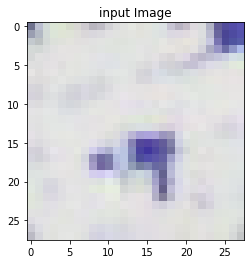

In [30]:
plt.imshow(test_image[1])
plt.title('input Image')

Text(0.5, 1.0, 'Output Similar Image')

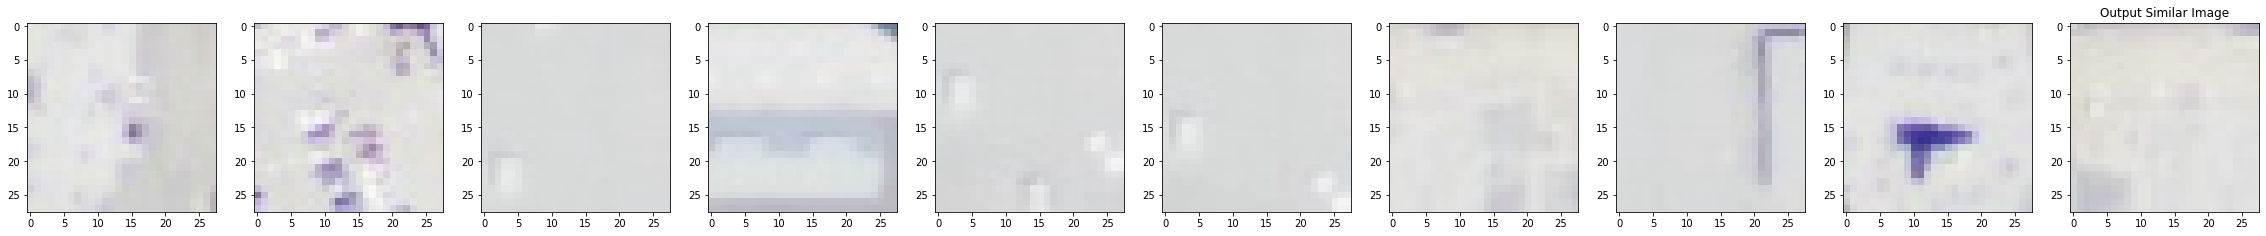

In [31]:
fig,axs=plt.subplots(1,len(neighbours[0]),figsize=(40,10))
for ax,outimg in zip(axs,neighbours[0]):   
    ax.imshow(train_image[outimg])
plt.title('Output Similar Image')

# Cosine Similarities

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
image_simil = cosine_similarity(x_test[1:2],x_train)

In [52]:
image_simil

array([[0.74854629, 0.74857856, 0.74926163, ..., 0.99278394, 0.99295536,
        0.99314846]])

In [49]:
image_simil.argsort()[0][-10:]

array([ 9275,   401, 11080,  2310, 19588, 16654,   212,  5535, 16133,
       19630], dtype=int64)

Text(0.5, 1.0, 'Output Cosine Similar Image')

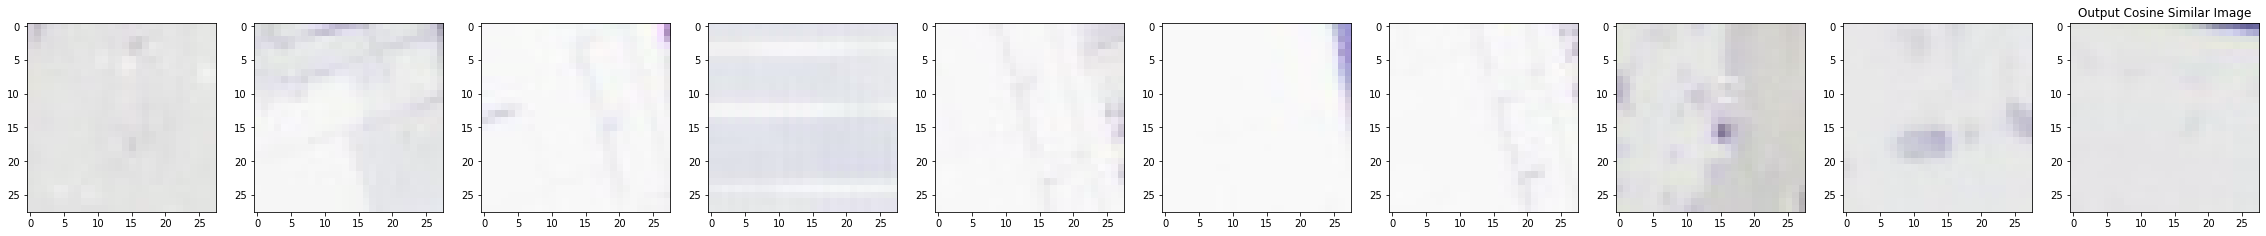

In [50]:
fig,axs=plt.subplots(1,len(neighbours[0]),figsize=(40,10))
for ax,outimg in zip(axs,image_simil.argsort()[0][-10:]):   
    ax.imshow(train_image[outimg])
plt.title('Output Cosine Similar Image')